<a href="https://colab.research.google.com/github/Dhruvjain484/NLP-project-for-beginners/blob/main/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim

#Importing dataset

In [ ]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting = 3) #quoting is used to remove the double quotes in the dataset
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


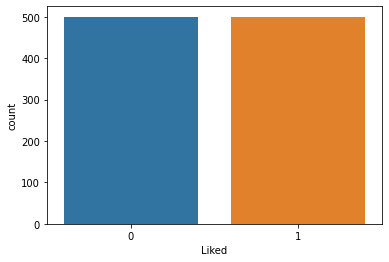

In [ ]:
import seaborn as sns
sns.countplot(dataset['Liked'])

#Cleaning the data`

In [ ]:
import re #re is used to simplify the data by keeping words only removing all the punctuation, etc.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_words = stopwords.words('english')
all_words = [word for word in all_words if word not in ('not', 'no', "hadn't","didn't")]

more_stopwords = """with some your just have from it's /via &amp; that they your there ask also this into providing would can't, """
all_words += more_stopwords.split()


from nltk.stem.porter import PorterStemmer
corpus = [] #List of all the clean reviews
for i in range(0, len(dataset)):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #removing that which not in the range a-z or A_Z
  review = review.lower()
  review = review.split() #Stop and print(review) to get a jist of what is going on
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(all_words)]
  review = ' '.join(review)
  corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset['stem_no_punc_and_stopwords'] = corpus
dataset.iloc[10:30, :]

,Review,Liked,stem_no_punc_and_stopwords
10,Service was very prompt.,1,servic prompt
11,Would not go back.,0,not go back
12,The cashier had no care what so ever on what I...,0,cashier no care ever say still end wayyy overpr
13,"I tried the Cape Cod ravoli, chicken, with cra...",1,tri cape cod ravoli chicken cranberri mmmm
14,I was disgusted because I was pretty sure that...,0,disgust pretti sure human hair
15,I was shocked because no signs indicate cash o...,0,shock no sign indic cash
16,Highly recommended.,1,highli recommend
17,Waitress was a little slow in service.,0,waitress littl slow servic
18,"This place is not worth your time, let alone V...",0,place not worth time let alon vega
19,did not like at all.,0,not like


#WORD CLOUD

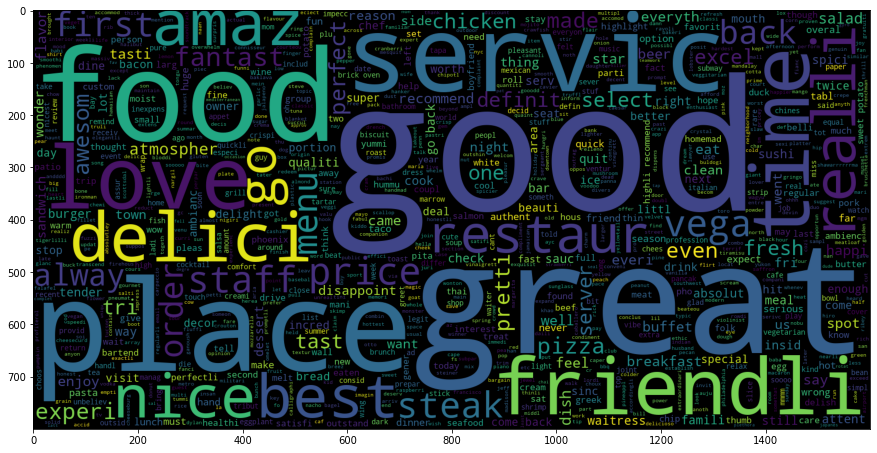

In [ ]:
from wordcloud import WordCloud

#Positive sentiment
plt.figure(figsize= (15,15))
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(' '.join(dataset[dataset['Liked'] ==1]['stem_no_punc_and_stopwords']))
plt.imshow(wc)

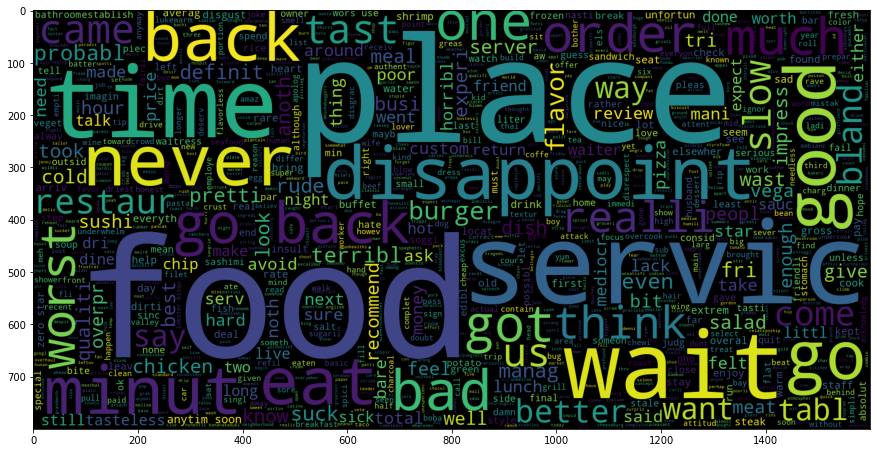

In [ ]:
#negative sentiment
plt.figure(figsize= (15,15))
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(' '.join(dataset[dataset['Liked'] ==0]['stem_no_punc_and_stopwords']))
plt.imshow(wc)

#Bag of words model

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)
x = cv.fit_transform(dataset['stem_no_punc_and_stopwords']).toarray()
y = dataset.iloc[:, 1].values

In [27]:
len(x)

1000

#Splitting the dataset into train-test

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Training the classification model

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#Predicting the result

In [18]:
y_pred = classifier.predict(x_test)


In [19]:
np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0,

#Confusion matrix




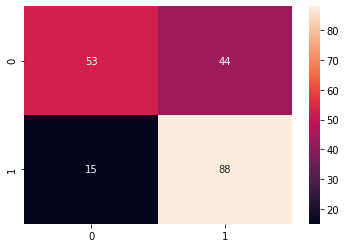

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [21]:
accuracy_score(y_test,y_pred)

0.705

#K-Fold cross validation

In [22]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, x_train, y_train, cv = 10)
cv.mean()

0.67